In [11]:
import pathlib
import pylab as plt
from datetime import datetime
#from matplotlib import pyplot as plt
import numpy as np
from numpy import unique
from numpy import where
import pandas as pd
import matplotlib
import seaborn as sns
import statsmodels.api as sm

import sys


In [12]:
sns.set_style('white')

In [13]:
PRJ='PRJNA747757'
BASE_PATH='/mnt/8TB_2/Data/Assembly/'
DATA_PATH=f'{BASE_PATH}{PRJ}/'
PLOT_PATH=DATA_PATH+'general_plots/'
PLOT_DATA_FILE='STAT_kraken2_bac.csv'
ITERATION=0
PARAMS=''
#PARAMS='default'

In [14]:
#df_accessions=pd.read_csv(PLOT_PATH+'accessions_kraken2.csv')

In [15]:
#df_accessions.head()

### bac

In [16]:
df_bac=pd.read_csv(PLOT_PATH+PLOT_DATA_FILE)

In [17]:
df_bac.head()

,SRA,Sample name,STAT_Bacteria,kraken2_Bacteria,Terrabacteria,FCB group,Fusobacteriales,Pseudomonadota,ScientificName,HKU4r-CoV reads,MAPQ20
0,SRR15195236,Tiger_Lung,0.12%,0.1%,53%,2%,0.20%,34%,Panthera tigris altaica,NaN,NaN
1,SRR15195237,Rabbit_Lung,0.13%,0.20%,60%,1%,0.10%,30%,Oryctolagus cuniculus,NaN,NaN
2,SRR15195238,Deer_Lung,0.07%,0.40%,87%,1%,0.04%,9%,Cervus nippon taiouanus,NaN,NaN
3,SRR15195239,Tiger_Spleen,0.09%,0.09%,43%,3%,0.30%,39%,Panthera tigris altaica,NaN,NaN
4,SRR15195240,Tiger_Liver,0.09%,0.1%,45%,2%,0.09%,39%,Panthera tigris altaica,NaN,NaN


In [18]:
df_bac['ScientificName'].value_counts()

Manis javanica             9
Felis catus                7
Panthera tigris altaica    5
Canis lupus familiaris     2
Cervus nippon taiouanus    1
Capra aegagrus             1
Columba livia              1
Anolis carolinensis        1
Oryctolagus cuniculus      1
Mesocricetus auratus       1
Name: ScientificName, dtype: int64

In [19]:
#combine single value species with similar bacteria percentages to make plot clearler
#df['O.cuniculus, C.livia, A,carolinensis'] = df['Oryctolagus cuniculus']+ df['Columba livia'] +  df['Anolis carolinensis']


In [20]:
df_bac = df_bac.dropna(axis=0, subset=['kraken2_Bacteria'])

In [21]:
df_bac.head()

,SRA,Sample name,STAT_Bacteria,kraken2_Bacteria,Terrabacteria,FCB group,Fusobacteriales,Pseudomonadota,ScientificName,HKU4r-CoV reads,MAPQ20
0,SRR15195236,Tiger_Lung,0.12%,0.1%,53%,2%,0.20%,34%,Panthera tigris altaica,NaN,NaN
1,SRR15195237,Rabbit_Lung,0.13%,0.20%,60%,1%,0.10%,30%,Oryctolagus cuniculus,NaN,NaN
2,SRR15195238,Deer_Lung,0.07%,0.40%,87%,1%,0.04%,9%,Cervus nippon taiouanus,NaN,NaN
3,SRR15195239,Tiger_Spleen,0.09%,0.09%,43%,3%,0.30%,39%,Panthera tigris altaica,NaN,NaN
4,SRR15195240,Tiger_Liver,0.09%,0.1%,45%,2%,0.09%,39%,Panthera tigris altaica,NaN,NaN


In [22]:
#df_bac['Bacteria'] = (pd.to_numeric(df_bac['Bacteria'].str[:-1])
#                            .div(100)
#                            .mask(df_bac['Bacteria'] == '%', 0))

In [23]:
df_bac['kraken2_Bacteria'] = (pd.to_numeric(df_bac['kraken2_Bacteria'].str[:-1])
                            .mask(df_bac['kraken2_Bacteria'] == '%', 0))

<AxesSubplot:ylabel='Frequency'>

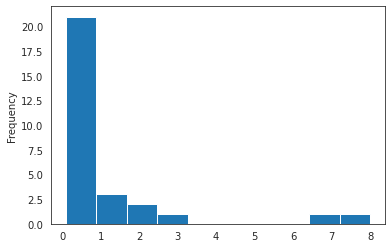

In [24]:
df_bac['kraken2_Bacteria'].plot(kind='hist')

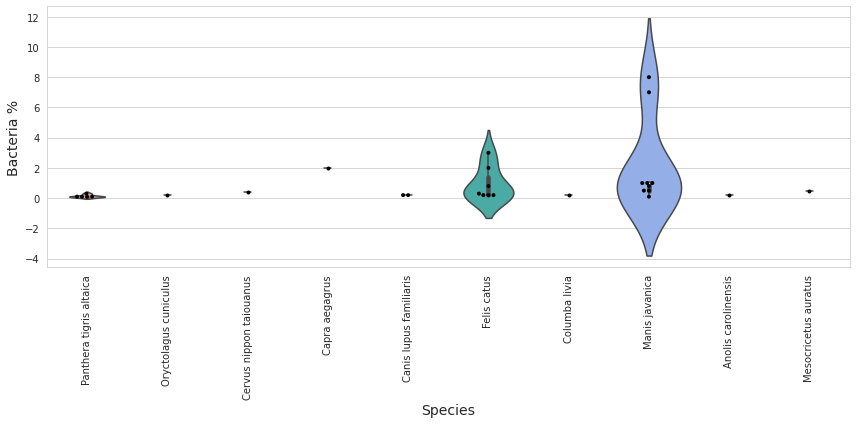

In [37]:
plt.figure(figsize=(12,6))
sns.set_palette("RdBu")
sns.set_style("whitegrid")
#sns.violinplot(data=df_bac, x='ScientificName', y='kraken2_Bacteria', scale='count', alpha=0.8)
#chart=sns.violinplot(data=df_bac, x='ScientificName', y='kraken2_Bacteria',color="k") 
chart=sns.violinplot(data=df_bac, x='ScientificName', y='kraken2_Bacteria', scale='count', alpha=0.8) 
sns.swarmplot(x='ScientificName', y='kraken2_Bacteria', data=df_bac, color='k', size=4)
chart.set_xlabel('Species', fontdict={'size': 14})
chart.set_ylabel('Bacteria %', fontdict={'size': 14})
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(PLOT_PATH+'bacteria_pct_violin_12.png', dpi=300)
plt.show()

### correlation between STAT and kraken2

In [376]:
df_stat_kra_bac=pd.read_csv(PLOT_PATH+"STAT_kraken2_bac.csv")

In [400]:
df_stat_kra_bac.head(n=20)

,SRA,Sample name,STAT_Bacteria,kraken2_Bacteria,Terrabacteria,FCB group,Fusobacteriales,Pseudomonadota,ScientificName,HKU4r-CoV reads,MAPQ20,kraken2_frac
0,SRR15195236,Tiger_Lung,0.12,0.10,0.0530,0.0020,0.00020,0.0340,Panthera tigris altaica,NaN,NaN,0.0010
1,SRR15195237,Rabbit_Lung,0.13,0.20,0.1200,0.0020,0.00020,0.0600,Oryctolagus cuniculus,NaN,NaN,0.0020
2,SRR15195238,Deer_Lung,0.07,0.40,0.3480,0.0040,0.00016,0.0360,Cervus nippon taiouanus,NaN,NaN,0.0040
3,SRR15195239,Tiger_Spleen,0.09,0.09,0.0387,0.0027,0.00027,0.0351,Panthera tigris altaica,NaN,NaN,0.0009
4,SRR15195240,Tiger_Liver,0.09,0.10,0.0450,0.0020,0.00009,0.0390,Panthera tigris altaica,NaN,NaN,0.0010
5,SRR15195241,Tiger_Kidney,0.54,0.30,0.2070,0.0012,0.00006,0.0780,Panthera tigris altaica,NaN,NaN,0.0030
6,SRR15195242,Tiger_Heart,0.15,0.10,0.0480,0.0020,0.00020,0.0390,Panthera tigris altaica,NaN,NaN,0.0010
7,SRR15199655,GT_LG,NaN,2.00,1.9400,0.0080,0.00060,0.0200,Capra aegagrus,NaN,NaN,0.0200
8,SRR15199656,DK_LG,NaN,0.20,0.0600,0.0040,0.00016,0.0980,Canis lupus familiaris,NaN,NaN,0.0020
9,SRR15199657,DG_LG,NaN,0.20,0.1560,0.0060,0.00060,0.0280,Canis lupus familiaris,NaN,NaN,0.0020


In [378]:
df_stat_kra_bac.dtypes

SRA                  object
Sample name          object
STAT_Bacteria        object
kraken2_Bacteria     object
Terrabacteria        object
FCB group            object
Fusobacteriales      object
Pseudomonadota       object
ScientificName       object
HKU4r-CoV reads     float64
MAPQ20              float64
dtype: object

In [379]:
df_stat_kra_bac['STAT_Bacteria'] = (pd.to_numeric(df_stat_kra_bac['STAT_Bacteria'].str[:-1])
                            .mask(df_stat_kra_bac['STAT_Bacteria'] == '%', 0))

df_stat_kra_bac['kraken2_Bacteria'] = (pd.to_numeric(df_stat_kra_bac['kraken2_Bacteria'].str[:-1])
                            .mask(df_stat_kra_bac['kraken2_Bacteria'] == '%', 0))

In [380]:
df_stat_kra_bac['kraken2_frac'] = df_stat_kra_bac['kraken2_Bacteria']/100

In [381]:
df_stat_kra_bac['Terrabacteria'] = (pd.to_numeric(df_stat_kra_bac['Terrabacteria'].str[:-1])
                            .mask(df_stat_kra_bac['Terrabacteria'] == '%', 0))
df_stat_kra_bac['Terrabacteria'] = df_stat_kra_bac['Terrabacteria']  * df_stat_kra_bac.kraken2_frac

df_stat_kra_bac['FCB group'] = (pd.to_numeric(df_stat_kra_bac['FCB group'].str[:-1])
                            .mask(df_stat_kra_bac['FCB group'] == '%', 0))
df_stat_kra_bac['FCB group'] = df_stat_kra_bac['FCB group'] * df_stat_kra_bac.kraken2_frac

df_stat_kra_bac['Fusobacteriales'] = (pd.to_numeric(df_stat_kra_bac['Fusobacteriales'].str[:-1])
                            .mask(df_stat_kra_bac['Fusobacteriales'] == '%', 0))
df_stat_kra_bac['Fusobacteriales'] = df_stat_kra_bac['Fusobacteriales'] * df_stat_kra_bac.kraken2_frac

df_stat_kra_bac['Pseudomonadota'] = (pd.to_numeric(df_stat_kra_bac['Pseudomonadota'].str[:-1])
                            .mask(df_stat_kra_bac['Pseudomonadota'] == '%', 0))
df_stat_kra_bac['Pseudomonadota'] = df_stat_kra_bac['Pseudomonadota'] * df_stat_kra_bac.kraken2_frac

In [382]:
df_stat_kra_na= df_stat_kra_bac.dropna(subset=['STAT_Bacteria'], how='all')

In [383]:
df_stat_kra_na.corr()

,STAT_Bacteria,kraken2_Bacteria,Terrabacteria,FCB group,Fusobacteriales,Pseudomonadota,HKU4r-CoV reads,MAPQ20,kraken2_frac
STAT_Bacteria,1.000000,0.861838,0.837905,0.729005,0.651622,0.585216,0.727490,0.727480,0.861838
kraken2_Bacteria,0.861838,1.000000,0.980101,0.726078,0.727624,0.705594,0.697866,0.697858,1.000000
Terrabacteria,0.837905,0.980101,1.000000,0.824308,0.823542,0.573248,0.814411,0.814407,0.980101
FCB group,0.729005,0.726078,0.824308,1.000000,0.999838,0.020493,0.999979,0.999979,0.726078
Fusobacteriales,0.651622,0.727624,0.823542,0.999838,1.000000,0.030354,0.999934,0.999933,0.727624
Pseudomonadota,0.585216,0.705594,0.573248,0.020493,0.030354,1.000000,-0.148762,-0.148774,0.705594
HKU4r-CoV reads,0.727490,0.697866,0.814411,0.999979,0.999934,-0.148762,1.000000,1.000000,0.697866
MAPQ20,0.727480,0.697858,0.814407,0.999979,0.999933,-0.148774,1.000000,1.000000,0.697858
kraken2_frac,0.861838,1.000000,0.980101,0.726078,0.727624,0.705594,0.697866,0.697858,1.000000


In [384]:
df_stat_kra_na.corr(method='spearman')

,STAT_Bacteria,kraken2_Bacteria,Terrabacteria,FCB group,Fusobacteriales,Pseudomonadota,HKU4r-CoV reads,MAPQ20,kraken2_frac
STAT_Bacteria,1.000000,0.715887,0.487936,-0.010318,0.147097,0.673524,0.371429,0.371429,0.715887
kraken2_Bacteria,0.715887,1.000000,0.868062,0.175611,0.009541,0.915900,0.576818,0.576818,1.000000
Terrabacteria,0.487936,0.868062,1.000000,0.286284,-0.099861,0.711350,0.885714,0.885714,0.868062
FCB group,-0.010318,0.175611,0.286284,1.000000,0.618138,-0.043563,0.637748,0.637748,0.175611
Fusobacteriales,0.147097,0.009541,-0.099861,0.618138,1.000000,-0.077320,0.576818,0.576818,0.009541
Pseudomonadota,0.673524,0.915900,0.711350,-0.043563,-0.077320,1.000000,0.200000,0.200000,0.915900
HKU4r-CoV reads,0.371429,0.576818,0.885714,0.637748,0.576818,0.200000,1.000000,1.000000,0.576818
MAPQ20,0.371429,0.576818,0.885714,0.637748,0.576818,0.200000,1.000000,1.000000,0.576818
kraken2_frac,0.715887,1.000000,0.868062,0.175611,0.009541,0.915900,0.576818,0.576818,1.000000


### HKU4-related CoV correlation

In [385]:
df_stat_kra_cov=df_stat_kra_bac.copy()
df_stat_kra_cov.fillna(0, inplace=True)
df_stat_kra_cov=df_stat_kra_cov.drop('STAT_Bacteria', axis=1)

### Pearson correlation coefficients

In [386]:
df_stat_kra_cov.corr()

,kraken2_Bacteria,Terrabacteria,FCB group,Fusobacteriales,Pseudomonadota,HKU4r-CoV reads,MAPQ20,kraken2_frac
kraken2_Bacteria,1.000000,0.887506,0.700709,0.705310,0.701812,0.697834,0.697828,1.000000
Terrabacteria,0.887506,1.000000,0.615356,0.629956,0.449106,0.605495,0.605492,0.887506
FCB group,0.700709,0.615356,1.000000,0.997718,0.070586,0.999644,0.999644,0.700709
Fusobacteriales,0.705310,0.629956,0.997718,1.000000,0.069284,0.995917,0.995916,0.705310
Pseudomonadota,0.701812,0.449106,0.070586,0.069284,1.000000,0.073740,0.073730,0.701812
HKU4r-CoV reads,0.697834,0.605495,0.999644,0.995917,0.073740,1.000000,1.000000,0.697834
MAPQ20,0.697828,0.605492,0.999644,0.995916,0.073730,1.000000,1.000000,0.697828
kraken2_frac,1.000000,0.887506,0.700709,0.705310,0.701812,0.697834,0.697828,1.000000


In [387]:
df_stat_kra_cov.corr(method='spearman')

,kraken2_Bacteria,Terrabacteria,FCB group,Fusobacteriales,Pseudomonadota,HKU4r-CoV reads,MAPQ20,kraken2_frac
kraken2_Bacteria,1.000000,0.909623,0.406391,0.308909,0.711777,0.561350,0.561350,1.000000
Terrabacteria,0.909623,1.000000,0.562584,0.382527,0.498891,0.399213,0.399213,0.909623
FCB group,0.406391,0.562584,1.000000,0.765792,0.079148,0.025438,0.025438,0.406391
Fusobacteriales,0.308909,0.382527,0.765792,1.000000,0.069853,0.129709,0.129709,0.308909
Pseudomonadota,0.711777,0.498891,0.079148,0.069853,1.000000,0.586007,0.586007,0.711777
HKU4r-CoV reads,0.561350,0.399213,0.025438,0.129709,0.586007,1.000000,1.000000,0.561350
MAPQ20,0.561350,0.399213,0.025438,0.129709,0.586007,1.000000,1.000000,0.561350
kraken2_frac,1.000000,0.909623,0.406391,0.308909,0.711777,0.561350,0.561350,1.000000


In [388]:
df_stat_kra_cov.head()

,SRA,Sample name,kraken2_Bacteria,Terrabacteria,FCB group,Fusobacteriales,Pseudomonadota,ScientificName,HKU4r-CoV reads,MAPQ20,kraken2_frac
0,SRR15195236,Tiger_Lung,0.10,0.0530,0.0020,0.00020,0.0340,Panthera tigris altaica,0.0,0.0,0.0010
1,SRR15195237,Rabbit_Lung,0.20,0.1200,0.0020,0.00020,0.0600,Oryctolagus cuniculus,0.0,0.0,0.0020
2,SRR15195238,Deer_Lung,0.40,0.3480,0.0040,0.00016,0.0360,Cervus nippon taiouanus,0.0,0.0,0.0040
3,SRR15195239,Tiger_Spleen,0.09,0.0387,0.0027,0.00027,0.0351,Panthera tigris altaica,0.0,0.0,0.0009
4,SRR15195240,Tiger_Liver,0.10,0.0450,0.0020,0.00009,0.0390,Panthera tigris altaica,0.0,0.0,0.0010


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='kraken2_Bacteria', ylabel='HKU4r-CoV reads'>

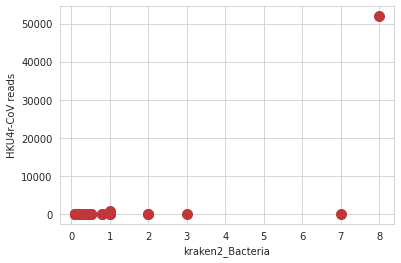

In [389]:
df_stat_kra_cov.plot.scatter(x = 'kraken2_Bacteria', y = 'HKU4r-CoV reads', s = 100)

In [390]:
y = df_stat_kra_cov['HKU4r-CoV reads'].tolist()
X = df_stat_kra_cov['kraken2_Bacteria'].tolist()
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.474
Model:                            OLS   Adj. R-squared (uncentered):              0.455
Method:                 Least Squares   F-statistic:                              25.25
Date:                Tue, 23 May 2023   Prob (F-statistic):                    2.59e-05
Time:                        23:45:55   Log-Likelihood:                         -297.88
No. Observations:                  29   AIC:                                      597.8
Df Residuals:                      28   BIC:                                      599.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [391]:
y = df_stat_kra_cov['HKU4r-CoV reads'].tolist()
X = df_stat_kra_cov['Terrabacteria'].tolist()
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.356
Model:                            OLS   Adj. R-squared (uncentered):              0.334
Method:                 Least Squares   F-statistic:                              15.51
Date:                Tue, 23 May 2023   Prob (F-statistic):                    0.000495
Time:                        23:45:55   Log-Likelihood:                         -300.81
No. Observations:                  29   AIC:                                      603.6
Df Residuals:                      28   BIC:                                      605.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### correlation between STAT bac and MP Liu CoV

In [392]:
df_stat_P_bac=pd.read_csv(PLOT_PATH+"PRJNA573298_STAT_bac.csv")

In [393]:
df_stat_P_bac.fillna(0, inplace=True)

In [394]:
df_stat_P_bac.head()

,Sample name,SRA,Bacteria,N
0,Lung13,SRR10168373,7.6,0.0
1,Lung12,SRR10168374,0.9,4.0
2,Lung11,SRR10168375,22.0,7.0
3,Lung09,SRR10168376,21.0,35.0
4,Lung08,SRR10168377,13.0,984.0


In [395]:
df_stat_P_bac.corr()

,Bacteria,N
Bacteria,1.000000,0.294227
N,0.294227,1.000000


In [396]:
df_stat_P_bac.corr(method='spearman')

,Bacteria,N
Bacteria,1.000000,0.581215
N,0.581215,1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Bacteria', ylabel='N'>

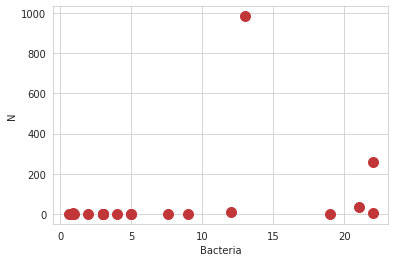

In [397]:
df_stat_P_bac.plot.scatter(x = 'Bacteria', y = 'N', s = 100)

array([[<AxesSubplot:title={'center':'Bacteria'}>,
        <AxesSubplot:title={'center':'N'}>]], dtype=object)

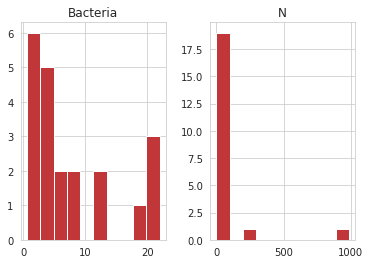

In [398]:
df_stat_P_bac.hist(bins=10)

In [399]:
y = df_stat_P_bac['N'].tolist()
X = df_stat_P_bac['Bacteria'].tolist()
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.157
Model:                            OLS   Adj. R-squared (uncentered):              0.115
Method:                 Least Squares   F-statistic:                              3.738
Date:                Tue, 23 May 2023   Prob (F-statistic):                      0.0675
Time:                        23:45:56   Log-Likelihood:                         -141.47
No. Observations:                  21   AIC:                                      284.9
Df Residuals:                      20   BIC:                                      286.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------